### Plot a Correlation Matrix as HeatMap

In [1]:
import pandas as pd
import numpy as np

# used only because the dataset is on Object Storage
import ocifs

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# as in ocifs example

#
# reads a CSV file from Object Storage into a Pandas DataFrame
#
def read_from_object_storage(prefix, file_name):
    # get access to OSS as an fs
    
    # config={} assume RESOURCE PRINCIPAL authorization
    # RP needs to be configured
    fs = ocifs.OCIFileSystem(config={})
    
    FILE_PATH = prefix + file_name
    
    print('Reading using file_path:', FILE_PATH)
    
    # reading data from Object Storage
    with fs.open(FILE_PATH, 'rb') as f:
        #
        # This is an example, in general you should set appropiate parameters.
        # nothing to do with ocifs
        # for encoding, here an example with 8859, but could be utf... set as appropriate
        #
        df = pd.read_csv(f, delimiter=',', encoding = "ISO-8859-1")
    
    return df

In [3]:
# The format for prefix is oci://<bucket_name>@<namespace name>

PREFIX = "oci://data-best-practices@frqap2zhtzbe/"

# put your file name here
FILE_NAME = "RACES.csv"

# see in functions above
races_df = read_from_object_storage(prefix=PREFIX, file_name=FILE_NAME)

Reading using file_path: oci://data-best-practices@frqap2zhtzbe/RACES.csv


In [4]:
# this is the dataset we're using for the example
races_df.head()

,RACEID,YEAR,ROUND,NAME,F1DATE,TIME,URL,SCORE,DNF_COUNT,DNF_DUE_TO_ACCIDENT_COUNT,WEATHER,WEATHER_WET,CIRCUITREF,YEAR_C,RACE_COUNT,NAME_YEAR,OVERTAKEN_POSITIONS_TOTAL
0,25,2008,8,French Grand Prix,22-JUN-08,12:00:00,http://en.wikipedia.org/wiki/2008_French_Grand...,5.548,1,1,Dry at first; light rain in the final stages,Y,magny_cours,2008,1,2008 French Grand Prix,169
1,27,2008,10,German Grand Prix,20-JUL-08,12:00:00,http://en.wikipedia.org/wiki/2008_German_Grand...,7.180,3,1,"Cloudy, later sunny[1]",N,hockenheimring,2008,1,2008 German Grand Prix,181
2,23,2008,6,Monaco Grand Prix,25-MAY-08,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...,8.177,6,5,"Wet, drying later.",Y,monaco,2008,1,2008 Monaco Grand Prix,147
3,9,2009,9,German Grand Prix,12-JUL-09,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...,7.096,2,0,Sunny and overcast,N,nurburgring,2009,1,2009 German Grand Prix,236
4,6,2009,6,Monaco Grand Prix,24-MAY-09,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,5.504,6,5,Sunny,N,monaco,2009,1,2009 Monaco Grand Prix,92


In [5]:
# Score is a score given by people to the F1 race. We want to find out if we can use some field to predict the score
# therefore we compute the (linear) correlation between score and the other fields

# First: we compute the correlation matrix using Pandas corr()
col_used = ['DNF_COUNT', 'DNF_DUE_TO_ACCIDENT_COUNT','OVERTAKEN_POSITIONS_TOTAL', 'SCORE']

corr_matrix = races_df[col_used].corr()

corr_matrix

,DNF_COUNT,DNF_DUE_TO_ACCIDENT_COUNT,OVERTAKEN_POSITIONS_TOTAL,SCORE
DNF_COUNT,1.000000,0.449251,-0.665943,0.303792
DNF_DUE_TO_ACCIDENT_COUNT,0.449251,1.000000,-0.206927,0.210561
OVERTAKEN_POSITIONS_TOTAL,-0.665943,-0.206927,1.000000,0.415328
SCORE,0.303792,0.210561,0.415328,1.000000


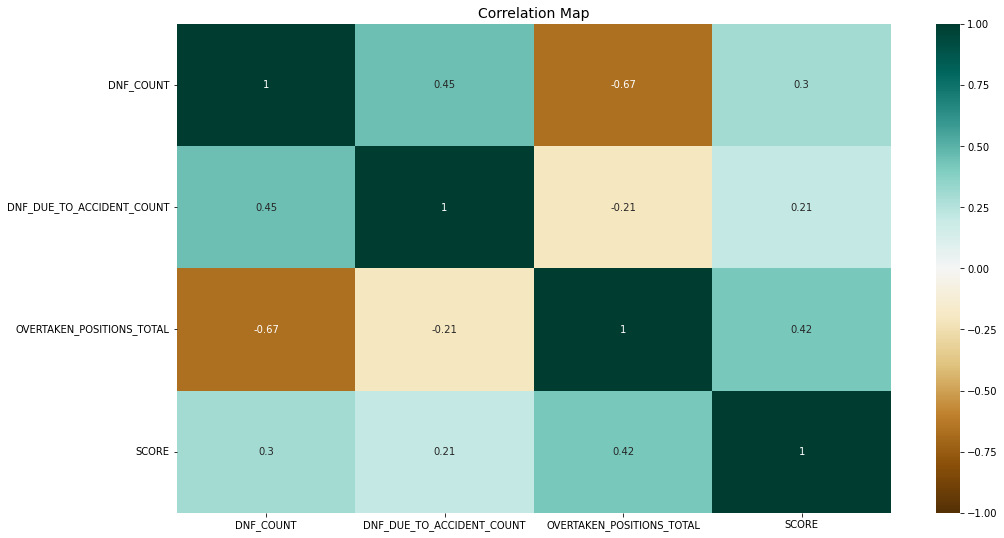

In [6]:
#
# Then we plot it as an HeatMap
#
FIGSIZE = (16, 9)

plt.figure(figsize=FIGSIZE)

# for the colormap, see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Map', fontdict={'fontsize':14});

In [7]:
# from the Map we can see that there is in general a good correlation, especially between score and OVERTAKEN_POSITIONS_TOTAL